# Qiskit Tools

In this notebook, we will present some general tools and how to retrieve some information that might be useful when programming with Qiskit.z

In [1]:
from qiskit import IBMQ, BasicAer, QuantumCircuit, execute
import qiskit.tools.jupyter 
from qiskit.tools import job_monitor
from qiskit.visualization import plot_gate_map, plot_error_map
from qiskit.providers.ibmq import least_busy

provider = IBMQ.load_account()

## Retrieving some information

 <b> 1. the complete information about the version of Qiskit we have installed, as well as information about our own GPU is obtained in table format by  <b>

In [2]:
%qiskit_version_table

 <b> 2.  Also all the qiskit versions above is also obtainable in _text_ format  <b>

In [3]:
print(qiskit.__qiskit_version__)

{'qiskit-terra': '0.19.2', 'qiskit-aer': '0.10.3', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': '0.34.2', 'qiskit-nature': '0.3.1', 'qiskit-finance': '0.3.1', 'qiskit-optimization': '0.3.1', 'qiskit-machine-learning': '0.3.1'}


 <b> 3. Note, if only qiskit terra version is needed, we use  <b>

In [4]:
## qiskit terra version

print(qiskit.__version__) 

0.19.2


 <b> 4. Qiskit copyright  <b>

In [5]:
%qiskit_copyright

 <b> 5. Which backends are avaialable in simulators is also retrievable  <b>

In [6]:
BasicAer.backends()

# It works also for other simulators such as: Aer.backends()

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

<b> 6. By the way, not only simulators, but you can also take a look at real backends that are available for free from IBM at the moment. This is very useful, for example, to know how many jobs are running in each machine <b>

In [7]:
%qiskit_backend_overview

<b> 6. the least busy backend among other config. preferences can be also selected directly by <b>

In [8]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))

print(backend)

ibm_oslo


<b> 7. Finally, we can call up readout errors and the gate map of real backend <b>

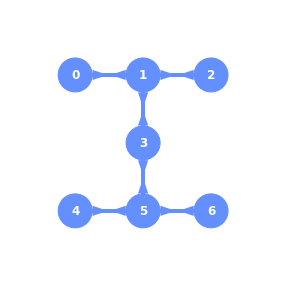

In [9]:
# Plot gate map
plot_gate_map(backend, plot_directed = True)

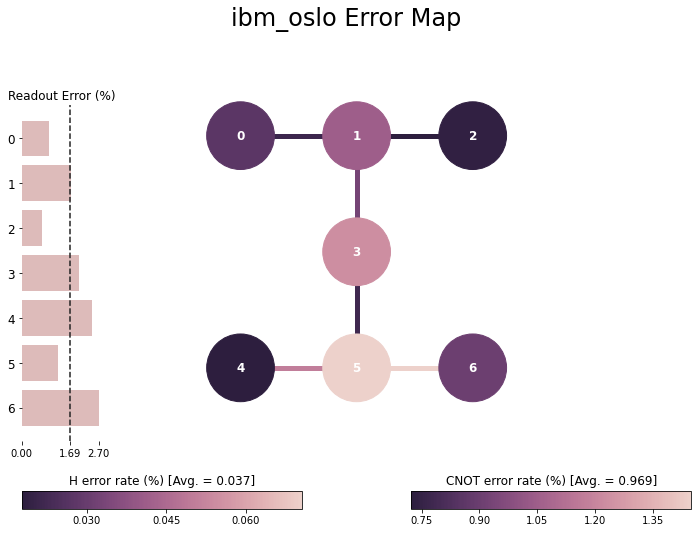

In [10]:
# Plot error map
plot_error_map(backend)

## Importing files and exporting string with QASM

 <b> 1. Importing:<b> `QuantumCircuit.from_qasm_file('myfile.qasm')` 

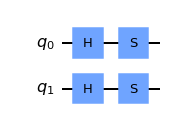

In [11]:
qc_open = QuantumCircuit.from_qasm_file('myfile.qasm')
qc_open.draw('mpl')

 <b> 2. Exporting string with QASM  <b>

* `qc.qasm()`
* `QuantumCircuit.from_qasm_str`

In [12]:
temp = QuantumCircuit(2)
temp.h(0)
temp.h(1)
temp.s(0)
temp.s(1)

qasm_str = temp.qasm() #returning a qasm string, THIS SIMPLE
qasm_str

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\nh q[0];\nh q[1];\ns q[0];\ns q[1];\n'

Just checking if both files match

In [13]:
qc_open1 = QuantumCircuit.from_qasm_str(qasm_str)
qc_open1 == qc_open

True

## Job infos

 <b> 1. This creates a pop up of your jobs. Look at the top left of the screen  <b>


In [14]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

 <b> 2. job status and job monitor (real time infos about your job)  <b>

In [15]:
backend_sim = BasicAer.get_backend('qasm_simulator')
job = execute(qc_open1, backend_sim, shots = 1024)

job_monitor(job)

# or 

job.status()

No classical registers in circuit "circuit-11", counts will be empty.


Job Status: job has successfully run


<JobStatus.DONE: 'job has successfully run'>